# **Cow Identification Model**
This is a cow identification model.

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential, load_model
from tensorflow import keras
from keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.11.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
data_dir = '/content/drive/MyDrive/Datasets/train'
data_dir = pathlib.Path(data_dir)
print(data_dir)

/content/drive/MyDrive/Datasets/train


In [ ]:
cow1 = list(data_dir.glob('cow1/*'))
print(type(cow1[0]))
# PIL.Image.open(str(roses[0]))

<class 'pathlib.PosixPath'>


In [ ]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
  )

Found 426 files belonging to 22 classes.
Using 341 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 426 files belonging to 22 classes.
Using 85 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cow1', 'cow10', 'cow11', 'cow12', 'cow13', 'cow14', 'cow15', 'cow16', 'cow17', 'cow18', 'cow19', 'cow2', 'cow20', 'cow21', 'cow22', 'cow3', 'cow4', 'cow5', 'cow6', 'cow7', 'cow8', 'cow9']


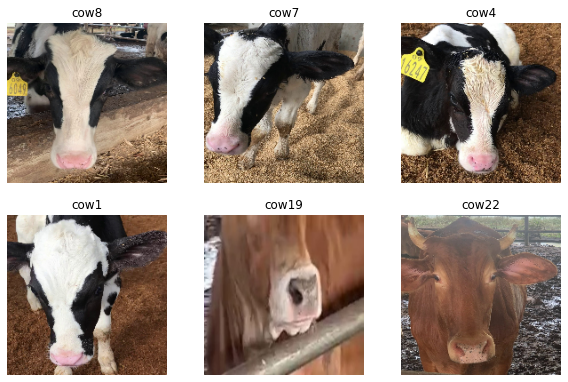

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Training the Model

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=22,
                   weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(22, activation='softmax'))



In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 22)               11286     
 pper)                                                           
                                                                 
Total params: 24,648,086
Trainable params: 1,060,374
Non-trainable params: 23,587,712
__________________________________

In [ ]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(
          rotation_range=10,
          zoom_range=0.15,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.15,
          horizontal_flip= False,
          vertical_flip= False,
          fill_mode="nearest"
          )

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  # aug.flow(train_ds, val_ds, batch_size=2),
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 14s 401ms/step - loss: 2.9635 - accuracy: 0.3021 - val_loss: 1.3647 - val_accuracy: 0.6353
Epoch 2/10
11/11 [==============================] - 7s 231ms/step - loss: 0.5407 - accuracy: 0.8416 - val_loss: 0.7809 - val_accuracy: 0.7765
Epoch 3/10
11/11 [==============================] - 4s 181ms/step - loss: 0.1931 - accuracy: 0.9501 - val_loss: 0.4556 - val_accuracy: 0.8706
Epoch 4/10
11/11 [==============================] - 6s 218ms/step - loss: 0.0498 - accuracy: 0.9971 - val_loss: 0.4592 - val_accuracy: 0.8588
Epoch 5/10
11/11 [==============================] - 4s 183ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.8706
Epoch 6/10
11/11 [==============================] - 4s 181ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.3377 - val_accuracy: 0.8941
Epoch 7/10
11/11 [==============================] - 6s 209ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.8941
Epoch

Evaluating the Model

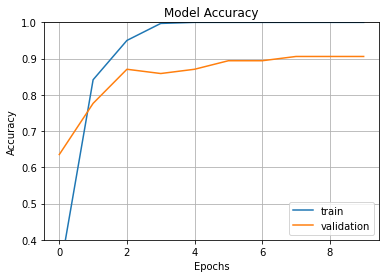

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

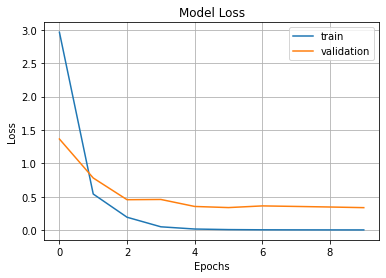

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making predictions

In [ ]:
import cv2
image=cv2.imread('/content/drive/MyDrive/Datasets/test1/cow9/cow9_8.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 1s 991ms/step
[[7.1328082e-05 6.0606215e-02 4.5475212e-04 5.8083993e-04 5.2043126e-04
  8.2418387e-04 3.8803100e-06 1.8096473e-06 7.8588425e-07 1.9389232e-05
  9.0054309e-05 5.5789751e-05 1.4615535e-05 7.8381581e-06 1.7160897e-03
  1.4132811e-03 6.9780642e-04 3.1904958e-04 2.4967588e-02 1.6803930e-04
  5.3404924e-03 9.0212572e-01]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is cow9


In [ ]:
test_dir = '/content/drive/MyDrive/Datasets/test3'
test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size=5,
    label_mode='categorical',
    shuffle=False)


# Evaluate your model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)

# Print the results
print(f"Test accuracy: {test_accuracy}")

Found 110 files belonging to 22 classes.
22/22 [==============================] - 1s 36ms/step - loss: 0.9181 - accuracy: 0.7545
Test accuracy: 0.7545454502105713


In [ ]:
# Save the model
resnet_model.save('/content/drive/MyDrive/Datasets/resnet_model_75')

In [ ]:
from keras.models import load_model

# Load the saved model
model_test = load_model('/content/drive/MyDrive/Datasets/resnet_model_90')

import cv2
image=cv2.imread('/content/drive/MyDrive/Datasets/test1/cow9/cow9_8.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

# Make predictions using the loaded model
predictions = model_test.predict(image)

(1, 180, 180, 3)
1/1 [==============================] - 8s 8s/step


In [ ]:
print(predictions)

[[1.5614462e-03 2.1735434e-01 1.7534798e-03 4.4295226e-05 3.5124991e-04
  4.1611623e-02 4.1090971e-05 3.7137595e-06 2.5022482e-05 3.5193691e-05
  1.0924078e-04 1.3450204e-04 7.4958531e-05 4.7122445e-05 6.3617510e-04
  1.1390104e-02 7.6074182e-04 8.6880818e-02 1.8564337e-01 6.7046075e-04
  3.0911905e-03 4.4777977e-01]]


In [ ]:
output_class=class_names[np.argmax(predictions)]
print("The predicted class is", output_class)

The predicted class is cow9
